In [1]:
import time

import pandas as pd
from utils import *
import numpy as np
import seaborn as sns
import plotly.express as px

In [6]:
!python -m serial.tools.list_ports

/dev/ttyACM0        
/dev/ttyUSB0        
2 ports found


# Command

In [20]:
command_port = "/dev/ttyACM0"
motor = 1
leg_x = 1
leg_y = 0.5
leg_x_amplitude = 1
leg_y_amplitude = 1
ellipse_angle = 1

cmd = (motor, leg_x, leg_y, leg_x_amplitude, leg_y_amplitude, ellipse_angle)
command_batbot_V2(cmd, command_port)

Sending command to batbot leg_x: 120.0
leg_y: 90.0
leg_x_amplitude: 40.0
leg_y_amplitude: 60.0
Ellipse: 1
Sent!


# Measure

In [20]:
port = "/dev/ttyUSB0"
df1 = read_measurements_df_6axis(port=port, duration=5)


<Axes: xlabel='Time'>

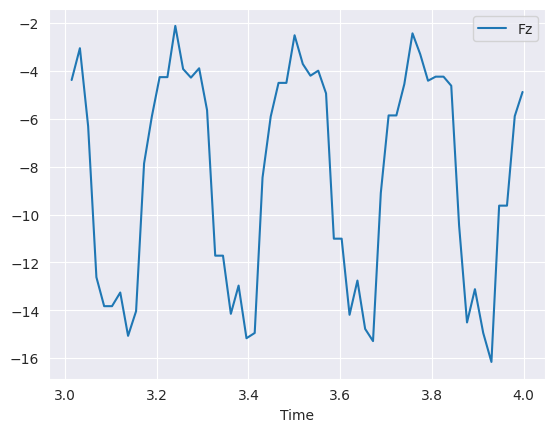

In [22]:
df1[(df1.Time<4)&(df1.Time>3)].plot(x='Time', y='Fz')

# Command and Measure

In [17]:
command_port = "/dev/ttyACM1"
port = "/dev/ttyUSB0"

command_batbotV2_2D((0,0.8), command_port)
time.sleep(1)
df = read_measurements_df_BSQJNP8(port=port, duration=5, calibration=True)

Sending command to batbot motor: 260.0, attack_angle: 112.0
Sent!
Reading measurements...


KeyboardInterrupt: 

# Visualization

In [25]:
df = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/experiments/schaum_schlagen/6_Axis.csv')
df.Fz = df.Fz + 915

In [36]:
df['Fres'] = np.sqrt(df.Fy**2 + (df.Fz)**2)
angle_rad = np.arctan2(df.Fz, df.Fy)
angle_deg = np.degrees(angle_rad)
angle_deg_360 = (angle_deg + 180) % 360
df['Angle'] = angle_deg_360

In [37]:
px.line(df, x='Time', y=['Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz', 'Fres', 'Angle'])

In [44]:
import plotly.express as px
import pandas as pd


# Create animated scatter plot
fig = px.scatter(df, x='Fy', y='Fz', animation_frame='Time', range_x=[df['Fy'].min()-1, df['Fy'].max()+1], range_y=[df['Fz'].min()-1, df['Fz'].max()+1])
fig.update_traces(marker=dict(size=15))
# Add line connecting the points
for i in range(1, len(df)):
    fig.add_shape(type='line',
                  x0=df['Fy'].iloc[i - 1], y0=df['Fz'].iloc[i - 1],
                  x1=df['Fy'].iloc[i], y1=df['Fz'].iloc[i],
                  line=dict(color='red', width=0.5))

# Show figure
fig.show()


In [ ]:
df.to_csv('/home/anuarsantoyo/PycharmProjects/Batbot/experiments/schaum_schlagen/6_Axis.csv', index=False)

# Tests

In [ ]:
fitness_project(df, plot=True)

## Checking if scores are stable

In [ ]:
command_port = "/dev/ttyACM1"
port = "/dev/ttyUSB0"
results = {0:[], 1:[]}
for angle in [1,0]:
    for test in range(5):
        command_batbotV2_2D((0.5, angle), command_port)
        time.sleep(1)
        df = read_measurements_df_BSQJNP8(port=port, duration=5, calibration=True)
        result = fitness_project(df, plot=True)
        results[angle].append(result)
        print(f'angle: {angle} = {result}')
        time.sleep(1)